In [0]:
import pandas as pd
import numpy as np

## 1. Scrape, Wrangle and Clean the DataFrame
https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai 

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Gurubux/Coursera_Capstone/master/Final/Mumbai_neighbourhood.csv',sep='\t')
df.head()

,Town,Station,Neighbourhood
0,Western Suburbs,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na..."
1,Western Suburbs,Bandra,"Bandra Kurla Complex,Bandstand Promenade,Gandh..."
2,Western Suburbs,Borivali,"I.C. Colony,L.I.C. Colony aka Jeevan Bhima Nag..."
3,Western Suburbs,Borivali East,"Magathane,Nancy Colony,Sukurwadi"
4,Western Suburbs,Dahisar,Dahisar


In [3]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [4]:
"""for index, row in df.iterrows():
  print(row['Station'])
  address = row['Station']+', Mumbai'
  geolocator = Nominatim(user_agent="foursquare_agent")
  if(geolocator.geocode(address) != None):
    print(address,'>>',geolocator.geocode(address).latitude, geolocator.geocode(address).longitude)
    df.set_value(index,'Latitude',geolocator.geocode(address).latitude)
    df.set_value(index,'Longitude',geolocator.geocode(address).longitude)
    """

'for index, row in df.iterrows():\n  print(row[\'Station\'])\n  address = row[\'Station\']+\', Mumbai\'\n  geolocator = Nominatim(user_agent="foursquare_agent")\n  if(geolocator.geocode(address) != None):\n    print(address,\'>>\',geolocator.geocode(address).latitude, geolocator.geocode(address).longitude)\n    df.set_value(index,\'Latitude\',geolocator.geocode(address).latitude)\n    df.set_value(index,\'Longitude\',geolocator.geocode(address).longitude)\n    '

In [0]:
#df.set_value(21,'Latitude',18.949169)
#df.set_value(21,'Longitude',72.826828)

In [0]:
#df.to_csv('/content/sample_data/Mumbai_neighbourhood_Final.csv', header=True, index=False, encoding='utf-8')

In [7]:
df_mum = pd.read_csv('https://raw.githubusercontent.com/Gurubux/Coursera_Capstone/master/Final/Mumbai_neighbourhood_Final.csv',sep=',')
df_mum.head()

,Town,Station,Neighbourhood,Latitude,Longitude
0,Western Suburbs,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.846420
1,Western Suburbs,Bandra,"Bandra Kurla Complex,Bandstand Promenade,Gandh...",19.054979,72.840220
2,Western Suburbs,Borivali,"I.C. Colony,L.I.C. Colony aka Jeevan Bhima Nag...",19.229068,72.857363
3,Western Suburbs,Borivali East,"Magathane,Nancy Colony,Sukurwadi",19.226723,72.861933
4,Western Suburbs,Dahisar,Dahisar,19.257178,72.857536


In [8]:
import folium # plotting library
address = 'Mumbai, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mumbai City are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Mumbai City are 18.9387711, 72.8353355.


In [9]:
# create map of New York using latitude and longitude values
map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_mum['Latitude'], df_mum['Longitude'], df_mum['Station'], df_mum['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [np.float(lat), np.float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,parse_html=False).add_to(map_mumbai)  
    
map_mumbai

In [10]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # plotting library

In [0]:
CLIENT_ID = 'ID' # your Foursquare ID 
CLIENT_SECRET = 'Secret' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [12]:
print(df_mum.shape)
#df_mum.head(38)

(55, 5)


## 2. Explore Neighbourhood Venues in 

Nariman Point, 

Malabar Hill, 

Breach Candy, 

Juhu, 

Hindu colony/Parsi Colony, 

Churchgate, 

Dahisar, 

Lower Parel, 

Sion, 

Ballard Estate



In [13]:
neighborhood_latitude = df_mum.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_mum.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_mum.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Nagar,Lokhandwala,Marol,Model Town,Oshiwara,Poonam Nagar,Sahar,Saki Naka,Seven Bungalows,Versova are 19.119697600000002, 72.8464205.


In [0]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL




In [15]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d6e2054446ea6002cb643f4'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b0587e2f964a52095a522e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16a941735',
         'name': 'Bakery',
         'pluralName': 'Bakeries',
         'primary': True,
         'shortName': 'Bakery'}],
       'id': '4b0587e2f964a52095a522e3',
       'location': {'address': 'Near Andheri Station, SV Road',
        'cc': 'IN',
        'city': 'Mumbai',
        'country': 'India',
        'crossStreet': 'Andheri West',
        'distance': 114,
        'formattedAddress': ['Near Andheri Station, SV Road (Andheri West)',
         'Mumbai 400 058',
         'Mahārāshtra',
         'India

In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Merwans Cake shop,Bakery,19.119300,72.845418
1,Narayan Sandwich,Sandwich Place,19.121398,72.850270
2,Radha Krishna Veg Restaurant,Indian Restaurant,19.115130,72.843060
3,McDonald's,Fast Food Restaurant,19.119691,72.846102
4,Shawarma Factory,Falafel Restaurant,19.124591,72.840398


In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# type your answer here

M5J_venues = getNearbyVenues(names=df_mum['Neighbourhood'],
                                   latitudes=df_mum['Latitude'],
                                   longitudes=df_mum['Longitude']
                                  )



Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Nagar,Lokhandwala,Marol,Model Town,Oshiwara,Poonam Nagar,Sahar,Saki Naka,Seven Bungalows,Versova
Bandra Kurla Complex,Bandstand Promenade,Gandhi Nagar,Kherwadi,Lands End,Pali Hill,Bandra Reclamation
I.C. Colony,L.I.C. Colony aka Jeevan Bhima Nagar,Eksar Colony,Shimpoli,Gorai,Kora Kendra,Vazira Naka,Babhai,Chikuwadi,Yogi Nagar
Magathane,Nancy Colony,Sukurwadi
Dahisar
Aarey Milk Colony,Motilal Nagar,Bangur Nagar,Gokuldham,Pandurangwadi,NESCO colony
Jogeshwari West,Jogeshwari East
Juhu
Charkop,Poisar,Hindustan Naka,Mahavir Nagar
Samta nagar,Damu nagar,Thakur complex,Thakur village,Lokandwala township,Akurli road,Janupada,Hanuman nagar
Pali Naka,Khar Danda
Dindoshi,Sunder Nagar,Pathanwadi,Rani Sati Marg,Malvani
Kalina
Naigaon,Nalasopara
Virar
Irla
Antop Hill
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lalbaug
Lower Parel
Mahala

In [21]:
print(M5J_venues.shape)
M5J_venues.head(20)

(951, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.84642,Merwans Cake shop,19.119300,72.845418,Bakery
1,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.84642,McDonald's,19.119691,72.846102,Fast Food Restaurant
2,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.84642,Narayan Sandwich,19.121398,72.850270,Sandwich Place
3,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.84642,Cafe Alfa,19.119667,72.843560,Indian Restaurant
4,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.84642,Zouk,19.118446,72.850698,Lounge
5,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.84642,McDonald's,19.118411,72.848002,Fast Food Restaurant
6,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.84642,Vaibhav Restaurant,19.118235,72.847991,Indian Restaurant
7,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.84642,Amar Restaurant,19.118193,72.845210,Restaurant
8,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.84642,Aditi Fast Food,19.119399,72.845949,Food Court
9,"Bandra Kurla Complex,Bandstand Promenade,Gandh...",19.054979,72.84022,Coalz,19.056468,72.839154,Café


In [22]:
M5J_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Aarey Milk Colony,Motilal Nagar,Bangur Nagar,Gokuldham,Pandurangwadi,NESCO colony",18,18,18,18,18,18
Altamount Road,16,16,16,16,16,16
"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Nagar,Lokhandwala,Marol,Model Town,Oshiwara,Poonam Nagar,Sahar,Saki Naka,Seven Bungalows,Versova",9,9,9,9,9,9
Antop Hill,5,5,5,5,5,5
Ballard Estate,51,51,51,51,51,51
"Bandra Kurla Complex,Bandstand Promenade,Gandhi Nagar,Kherwadi,Lands End,Pali Hill,Bandra Reclamation",19,19,19,19,19,19
Bhuleshwar,9,9,9,9,9,9
Breach Candy,20,20,20,20,20,20
C.G.S. colony,4,4,4,4,4,4


In [23]:
print('There are {} uniques categories.'.format(len(M5J_venues['Venue Category'].unique())))

There are 152 uniques categories.


In [24]:
map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")


# set color scheme for the Venues based on the Major Districts
Districts = ['Nariman Point', 'Malabar Hill', 'Breach Candy', 'Juhu', 'Hindu colony,Parsi Colony','Churchgate','Dahisar','Lower Parel','Sion','Ballard Estate']
df_5 = M5J_venues[M5J_venues['Neighborhood'].isin(Districts)]
print(df_5.shape)
x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000','#a9a9a9','#f032e6','#911eb4','#bfef45','#f58231']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr,label in zip(df_5['Venue Latitude'], 
                                  df_5['Venue Longitude'], 
                                  df_5['Venue Category'], 
                                  df_5['Neighborhood'],
                                  df_5['Venue']):
    label = folium.Popup(str(poi) + ' ' + str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

(321, 7)


In [25]:
print (M5J_venues['Venue Category'].value_counts())

Indian Restaurant                  116
Café                                53
Fast Food Restaurant                40
Coffee Shop                         30
Chinese Restaurant                  30
Pizza Place                         27
Bakery                              26
Restaurant                          24
Bar                                 22
Dessert Shop                        21
Hotel                               20
Italian Restaurant                  19
Lounge                              19
Snack Place                         19
Ice Cream Shop                      18
Sandwich Place                      17
Department Store                    17
Train Station                       15
Seafood Restaurant                  15
Asian Restaurant                    14
Vegetarian / Vegan Restaurant       12
Theater                             11
Park                                11
Movie Theater                       10
Gym / Fitness Center                 9
Bookstore                

In [26]:
# create a dataframe of top 10 categories
M5J_venues_Top10 = M5J_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
M5J_venues_Top10=M5J_venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

M5J_venues_Top10.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
M5J_venues_Top10

,Venue Category,Frequency
0,Indian Restaurant,116
1,Café,53
2,Fast Food Restaurant,40
3,Coffee Shop,30
4,Chinese Restaurant,30
5,Pizza Place,27
6,Bakery,26
7,Restaurant,24
8,Bar,22
9,Dessert Shop,21


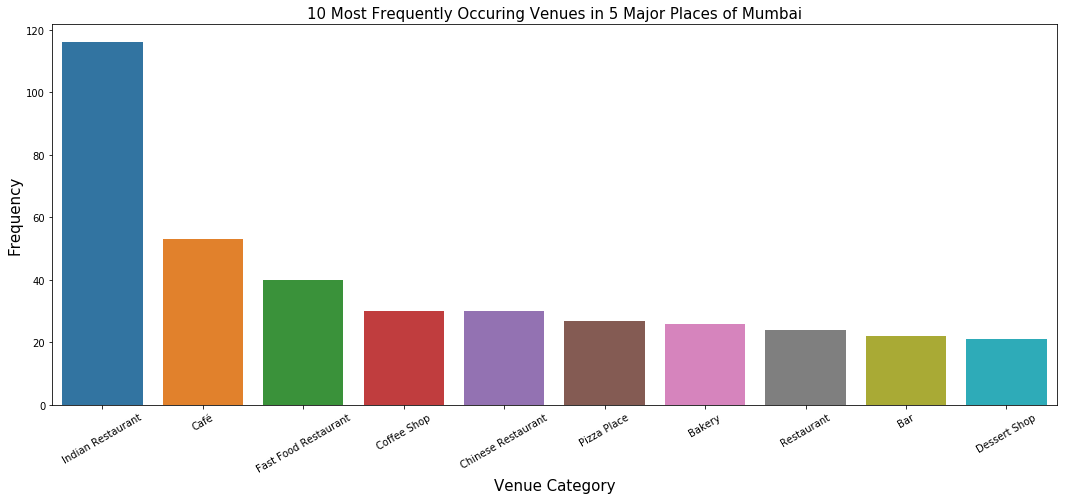

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=M5J_venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Places of Mumbai', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

**chinese Restaurant is one of the Most Frequent Venues in 5 Major Districts of Mumbai.**

### Analyze Each Neighborhood

In [0]:
# one hot encoding
M5J_onehot = pd.get_dummies(df_5[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
M5J_onehot['Neighborhood'] = df_5['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [M5J_onehot.columns[-1]] + list(M5J_onehot.columns[:-1])
M5J_onehot = M5J_onehot[fixed_columns]

#M5J_onehot.head()

In [29]:
M5J_onehot.shape

(321, 99)

In [0]:
M5J_grouped = M5J_onehot.groupby('Neighborhood').mean().reset_index()
#M5J_grouped

In [31]:
M5J_grouped.shape

(10, 99)

In [0]:
num_top_venues = 5

for hood in M5J_grouped['Neighborhood']:
    #print("----"+hood+"----")
    temp = M5J_grouped[M5J_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = M5J_grouped['Neighborhood']

for ind in np.arange(M5J_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(M5J_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ballard Estate,Indian Restaurant,Dessert Shop,Seafood Restaurant,Lounge,Bookstore,Irani Cafe,Café,Fast Food Restaurant,Outdoors & Recreation,Monument / Landmark
1,Breach Candy,Bakery,Bar,Yoga Studio,Sandwich Place,Hotel,Women's Store,Donut Shop,Lounge,Men's Store,Department Store
2,Churchgate,Café,Indian Restaurant,Ice Cream Shop,Hotel,Cricket Ground,Fast Food Restaurant,Movie Theater,Athletics & Sports,Train Station,Cantonese Restaurant
3,Dahisar,Park,Pharmacy,Sandwich Place,Fast Food Restaurant,Liquor Store,Department Store,Chinese Restaurant,Basketball Court,Indian Restaurant,BBQ Joint
4,"Hindu colony,Parsi Colony",Indian Restaurant,Snack Place,Movie Theater,Fast Food Restaurant,Café,Department Store,Maharashtrian Restaurant,Lounge,Farmers Market,Breakfast Spot


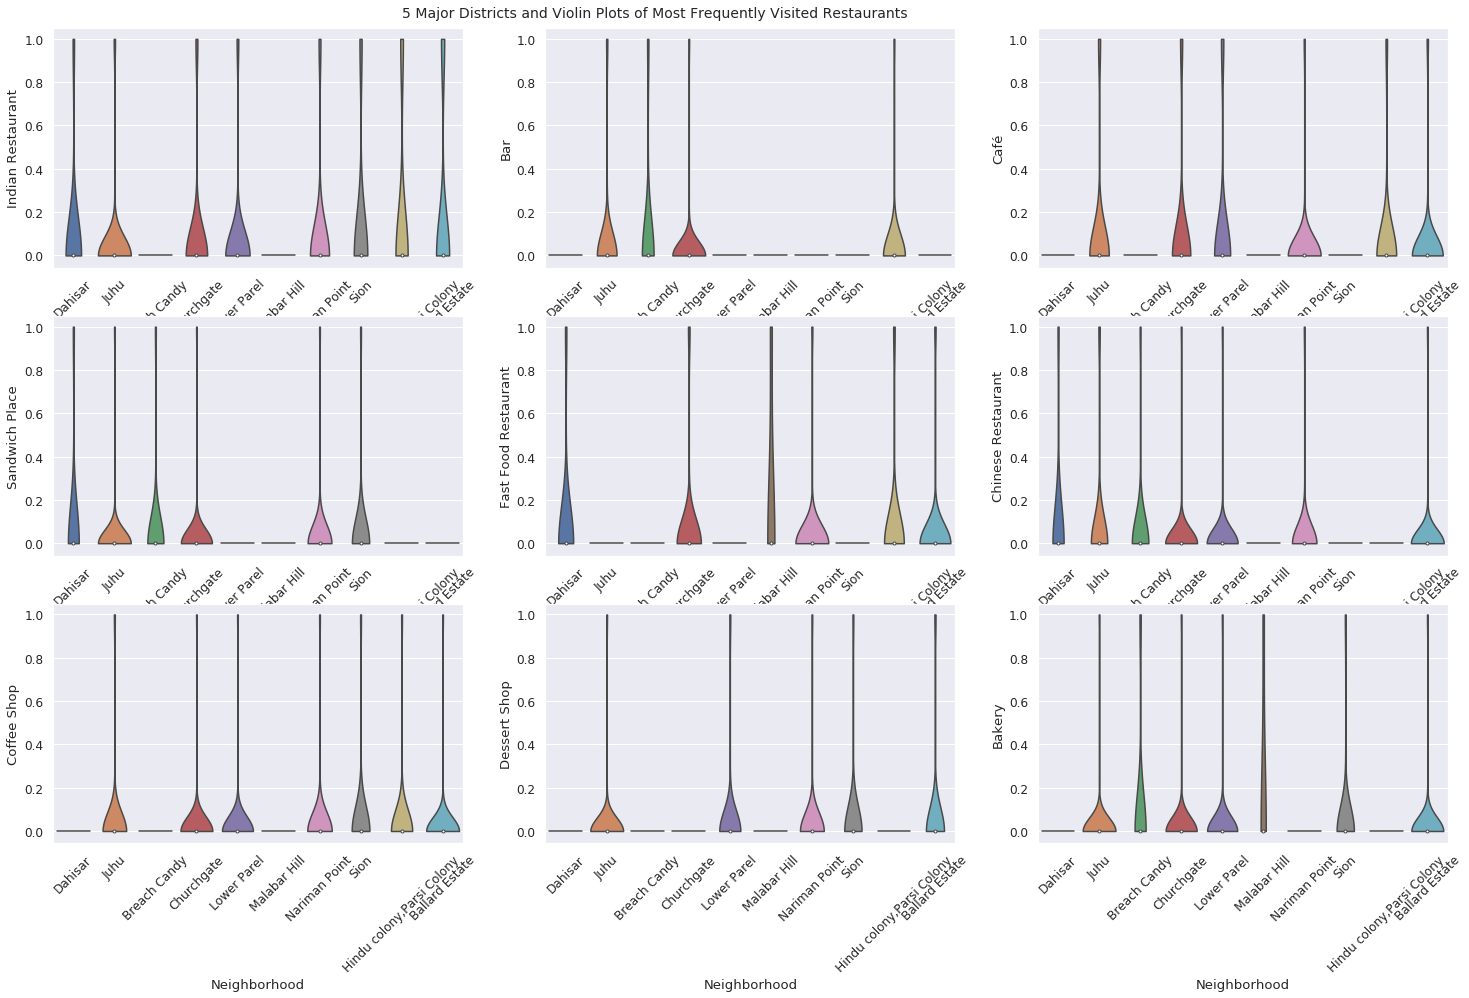

In [35]:
# Let's try Categorical plot 
fig = plt.figure(figsize=(25,15))

sns.set(font_scale=1.1)
ax = plt.subplot(3,3,1)
sns.violinplot(x="Neighborhood", y="Indian Restaurant", data=M5J_onehot, cut=0);
plt.xticks(rotation=45)
plt.xlabel("")
ax = plt.subplot(3,3,2)
sns.violinplot(x="Neighborhood", y="Bar", data=M5J_onehot, cut=0);
plt.xticks(rotation=45)
plt.xlabel("")
plt.subplot(3,3,3)
sns.violinplot(x="Neighborhood", y="Café", data=M5J_onehot, cut=0);
plt.xticks(rotation=45)
plt.subplot(3,3,4)
sns.violinplot(x="Neighborhood", y="Sandwich Place", data=M5J_onehot, cut=0);
plt.xticks(rotation=45)
plt.subplot(3,3,5)
sns.violinplot(x="Neighborhood", y="Fast Food Restaurant", data=M5J_onehot, cut=0);
plt.xticks(rotation=45)
plt.subplot(3,3,6)
sns.violinplot(x="Neighborhood", y="Chinese Restaurant", data=M5J_onehot, cut=0);
plt.xticks(rotation=45)
plt.subplot(3,3,7)
sns.violinplot(x="Neighborhood", y="Coffee Shop", data=M5J_onehot, cut=0);
plt.xticks(rotation=45)
plt.subplot(3,3,8)
sns.violinplot(x="Neighborhood", y="Dessert Shop", data=M5J_onehot, cut=0);
plt.xticks(rotation=45)
plt.subplot(3,3,9)
sns.violinplot(x="Neighborhood", y="Bakery", data=M5J_onehot, cut=0);
plt.xticks(rotation=45)
#ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, '5 Major Districts and Violin Plots of Most Frequently Visited Restaurants', fontsize=14)
plt.savefig ("Violin_plots_Dist_Frequent_Restaurant.png", dpi=240)
plt.show()

## 3. Cluster Neighborhoods

In [36]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 4

M5J_grouped_clustering = M5J_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(M5J_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 3, 1, 0, 3, 3, 2, 3, 0], dtype=int32)

In [0]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

M5J_merged = df_mum



In [38]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
M5J_merged = M5J_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

M5J_merged.head(100) # check the last columns!

,Town,Station,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Western Suburbs,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.846420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Western Suburbs,Bandra,"Bandra Kurla Complex,Bandstand Promenade,Gandh...",19.054979,72.840220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Western Suburbs,Borivali,"I.C. Colony,L.I.C. Colony aka Jeevan Bhima Nag...",19.229068,72.857363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Western Suburbs,Borivali East,"Magathane,Nancy Colony,Sukurwadi",19.226723,72.861933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Western Suburbs,Dahisar,Dahisar,19.257178,72.857536,1.0,Park,Pharmacy,Sandwich Place,Fast Food Restaurant,Liquor Store,Department Store,Chinese Restaurant,Basketball Court,Indian Restaurant,BBQ Joint
5,Western Suburbs,Goregaon,"Aarey Milk Colony,Motilal Nagar,Bangur Nagar,G...",19.164753,72.850018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Western Suburbs,Jogeshwari,"Jogeshwari West,Jogeshwari East",19.134899,72.848820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Western Suburbs,Juhu,Juhu,19.107021,72.827528,3.0,Café,Chinese Restaurant,Hotel,Lounge,Bar,Italian Restaurant,Asian Restaurant,Cocktail Bar,Spa,Coffee Shop
8,Western Suburbs,Kandivali west,"Charkop,Poisar,Hindustan Naka,Mahavir Nagar",19.208380,72.842227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Western Suburbs,Kandivali east,"Samta nagar,Damu nagar,Thakur complex,Thakur v...",19.210200,72.864891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
M5J_merged= M5J_merged.dropna()
M5J_merged['Cluster Labels'] = M5J_merged['Cluster Labels'].apply(lambda x:int(x))
M5J_merged.head()

,Town,Station,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Western Suburbs,Dahisar,Dahisar,19.257178,72.857536,1,Park,Pharmacy,Sandwich Place,Fast Food Restaurant,Liquor Store,Department Store,Chinese Restaurant,Basketball Court,Indian Restaurant,BBQ Joint
7,Western Suburbs,Juhu,Juhu,19.107021,72.827528,3,Café,Chinese Restaurant,Hotel,Lounge,Bar,Italian Restaurant,Asian Restaurant,Cocktail Bar,Spa,Coffee Shop
19,South Mumbai,Breach Candy,Breach Candy,18.971896,72.804032,3,Bakery,Bar,Yoga Studio,Sandwich Place,Hotel,Women's Store,Donut Shop,Lounge,Men's Store,Department Store
22,South Mumbai,Churchgate,Churchgate,18.935957,72.827340,3,Café,Indian Restaurant,Ice Cream Shop,Hotel,Cricket Ground,Fast Food Restaurant,Movie Theater,Athletics & Sports,Train Station,Cantonese Restaurant
32,South Mumbai,Lower Parel,Lower Parel,19.002988,72.830322,3,Café,Lounge,Asian Restaurant,Indian Restaurant,Pub,Brewery,Restaurant,Movie Theater,Dessert Shop,Japanese Restaurant


In [40]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(M5J_merged['Latitude'], M5J_merged['Longitude'], M5J_merged['Neighbourhood'], M5J_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    print(cluster)
    folium.CircleMarker(
        [np.float(lat), np.float(lon)],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

1
3
3
3
3
2
3
0
0
0


In [41]:
# create map
map_restaurants10 = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
#Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']
Districts = ['Nariman Point', 'Malabar Hill', 'Breach Candy', 'Juhu', 'Hindu colony,Parsi Colony','Churchgate','Dahisar','Lower Parel','Sion','Ballard Estate']
df_5 = M5J_merged[M5J_merged['Neighbourhood'].isin(Districts)]
list_rest_no = [34, 7, 20, 52, 28,50,9,48,21,48]
# add markers to the map
for lat, lon, poi, cluster in zip(df_5['Latitude'], 
                                  df_5['Longitude'], 
                                  df_5['Neighbourhood'], 
                                  df_5['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Districts.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

In [42]:
M5J_merged.loc[M5J_merged['Cluster Labels'] == 0, M5J_merged.columns[[1] + list(range(5, M5J_merged.shape[1]))]]

,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,Sion,0,Seafood Restaurant,Indian Restaurant,Bus Station,Gym / Fitness Center,Coffee Shop,Movie Theater,Dessert Shop,Bus Stop,Boutique,Bookstore
47,Dadar,0,Indian Restaurant,Snack Place,Movie Theater,Fast Food Restaurant,Café,Department Store,Maharashtrian Restaurant,Lounge,Farmers Market,Breakfast Spot
48,Fort,0,Indian Restaurant,Dessert Shop,Seafood Restaurant,Lounge,Bookstore,Irani Cafe,Café,Fast Food Restaurant,Outdoors & Recreation,Monument / Landmark


In [43]:
M5J_merged.loc[M5J_merged['Cluster Labels'] == 1, M5J_merged.columns[[1] + list(range(5, M5J_merged.shape[1]))]]

,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Dahisar,1,Park,Pharmacy,Sandwich Place,Fast Food Restaurant,Liquor Store,Department Store,Chinese Restaurant,Basketball Court,Indian Restaurant,BBQ Joint


In [44]:
M5J_merged.loc[M5J_merged['Cluster Labels'] == 2, M5J_merged.columns[[1] + list(range(5, M5J_merged.shape[1]))]]

,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Malabar Hill,2,Park,Fast Food Restaurant,Bakery,Restaurant,Yoga Studio,Convenience Store,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop


In [45]:
M5J_merged.loc[M5J_merged['Cluster Labels'] == 3, M5J_merged.columns[[1] + list(range(5, M5J_merged.shape[1]))]]

,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Juhu,3,Café,Chinese Restaurant,Hotel,Lounge,Bar,Italian Restaurant,Asian Restaurant,Cocktail Bar,Spa,Coffee Shop
19,Breach Candy,3,Bakery,Bar,Yoga Studio,Sandwich Place,Hotel,Women's Store,Donut Shop,Lounge,Men's Store,Department Store
22,Churchgate,3,Café,Indian Restaurant,Ice Cream Shop,Hotel,Cricket Ground,Fast Food Restaurant,Movie Theater,Athletics & Sports,Train Station,Cantonese Restaurant
32,Lower Parel,3,Café,Lounge,Asian Restaurant,Indian Restaurant,Pub,Brewery,Restaurant,Movie Theater,Dessert Shop,Japanese Restaurant
39,Nariman Point,3,Theater,Italian Restaurant,Indian Restaurant,Restaurant,Chaat Place,Mediterranean Restaurant,Hotel,Coffee Shop,Chinese Restaurant,French Restaurant


## 4. Collect Chinese Restaurant info for each Neighborhood for prospective buisiness Location


In [0]:
def get_venues(lat,lng):
    
    #set variables
    radius=2000
    LIMIT=100
    CLIENT_ID = 'ID' # your Foursquare ID
    CLIENT_SECRET = 'Secret' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [47]:
#Neighborhood	Neighborhood Latitude	Neighborhood Longitude	Venue	Venue Latitude	Venue Longitude	Venue Category
# prepare neighborhood list that contains chinese resturants
column_names=['Station', 'Neighborhood', 'ID','Name']
chinese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in df_mum.values.tolist():
    Town,Station,Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    Chinese_resturants=venues[venues['Category']=='Chinese Restaurant']  
    print('(',count,'/',len(df_mum),')','Chinese Restaurants in '+Neighborhood+', '+Station+':'+str(len(Chinese_resturants)))
    for resturant_detail in Chinese_resturants.values.tolist():
        id, name , category=resturant_detail
        chinese_rest_ny = chinese_rest_ny.append({'Station': Station,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 55 ) Chinese Restaurants in Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Nagar,Lokhandwala,Marol,Model Town,Oshiwara,Poonam Nagar,Sahar,Saki Naka,Seven Bungalows,Versova, Andheri:4
( 2 / 55 ) Chinese Restaurants in Bandra Kurla Complex,Bandstand Promenade,Gandhi Nagar,Kherwadi,Lands End,Pali Hill,Bandra Reclamation, Bandra:2
( 3 / 55 ) Chinese Restaurants in I.C. Colony,L.I.C. Colony aka Jeevan Bhima Nagar,Eksar Colony,Shimpoli,Gorai,Kora Kendra,Vazira Naka,Babhai,Chikuwadi,Yogi Nagar, Borivali:6
( 4 / 55 ) Chinese Restaurants in Magathane,Nancy Colony,Sukurwadi, Borivali East:5
( 5 / 55 ) Chinese Restaurants in Dahisar, Dahisar:3
( 6 / 55 ) Chinese Restaurants in Aarey Milk Colony,Motilal Nagar,Bangur Nagar,Gokuldham,Pandurangwadi,NESCO colony, Goregaon:3
( 7 / 55 ) Chinese Restaurants in Jogeshwari West,Jogeshwari East, Jogeshwari:4
( 8 / 55 ) Chinese Restaurants in Juhu, Juhu:3
( 9 / 55 ) Chinese Restaurants in Charkop,Poisar,Hindustan Naka,Mahavir Nagar, Kandivali west:5
( 10 

In [48]:
chinese_rest_ny.head()

,Station,Neighborhood,ID,Name
0,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",51fb7853498e2d2b68bc9b7c,King chilly
1,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",4e7f3bfa6c253723ab371422,Shanghai
2,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",4df24b2cd1649c8a28de604e,Shetty's Corner
3,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",4e4eb3c68877402b06b92160,"5 Spice , Bandra"
4,Bandra,"Bandra Kurla Complex,Bandstand Promenade,Gandh...",5554c803498e0c591b97b3e5,Wok Express


In [49]:
chinese_rest_ny.shape

(151, 4)

We got 153 Chinese Resturants across Mumbai City

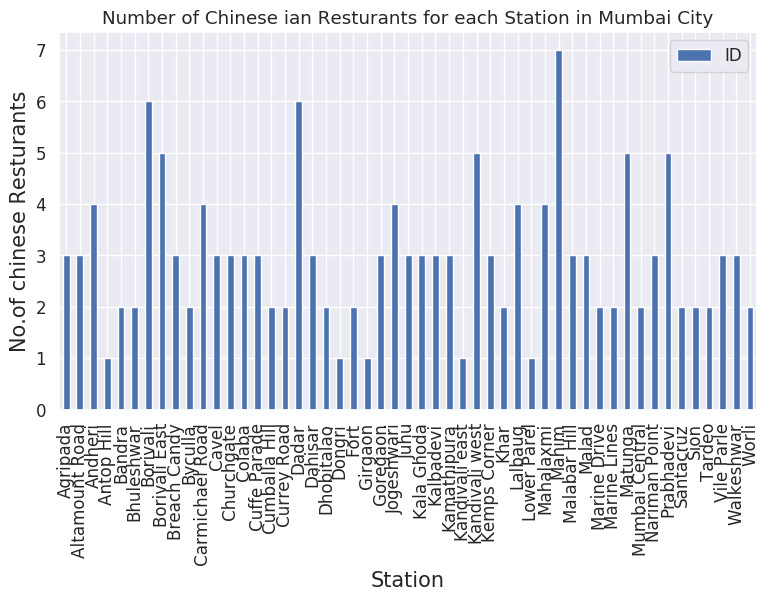

In [50]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Chinese ian Resturants for each Station in Mumbai City')
#On x-axis
plt.xlabel('Station', fontsize = 15)
#On y-axis
plt.ylabel('No.of chinese Resturants', fontsize=15)
#giving a bar plot
chinese_rest_ny.groupby('Station')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

So Mahim in Mahim has the highest number of chinese Resturants with a total count of 7.

In [51]:
chinese_rest_ny[chinese_rest_ny['Neighborhood']=='Mahim']


,Station,Neighborhood,ID,Name
90,Mahim,Mahim,4da0746858c2224bea9f5279,Icy Spicy
91,Mahim,Mahim,4b0587d7f964a520dfa322e3,Status Restaurants & Bar
92,Mahim,Mahim,4d346742eefa8cfa2e624ab3,Paul's Chinese
93,Mahim,Mahim,4cd6628b76ab721e9deb726a,Jim-me's Kitchen
94,Mahim,Mahim,4b0587daf964a52055a422e3,Gypsy Chinese Restaurant
95,Mahim,Mahim,52d25c5b11d257eb1de0832c,China Bistro
96,Mahim,Mahim,4e4d4d63aeb77d4a40e6c5db,Lucky Dragon


## 5. Ranking of each resturant for competition check

In [0]:
def get_venue_details(venue_id):
        
    CLIENT_ID = 'ID' # your Foursquare ID
    CLIENT_SECRET = 'Secret' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    print(venue_id,results)
    #if('venue' in results['response'].keys()):
    if(True):
      venue_data=results['response']['venue']
      venue_details=[]
      try:
          venue_id=venue_data['id']
          venue_name=venue_data['name']
          venue_likes=venue_data['likes']['count']
          venue_rating=venue_data['rating']
          venue_tips=venue_data['tips']['count']
          venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
      except KeyError:
          pass
        
      column_names=['ID','Name','Likes','Rating','Tips']
      df = pd.DataFrame(venue_details,columns=column_names)
      return df
    #else:
      #venue_details=[]
      #column_names=['ID','Name','Likes','Rating','Tips']
      #df = pd.DataFrame(venue_details,columns=column_names)
      #return df

In [53]:
# prepare neighborhood list that contains chinese resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
chinese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in chinese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(chinese_rest_ny),')','processed')
    chinese_rest_stats_ny = chinese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

51fb7853498e2d2b68bc9b7c {'meta': {'code': 200, 'requestId': '5d6e2082cf72a000395eb339'}, 'response': {'venue': {'id': '51fb7853498e2d2b68bc9b7c', 'name': 'King chilly', 'contact': {}, 'location': {'address': 'Koteshwar Palace, Shop No 2', 'crossStreet': 'Jumbo Darshan', 'lat': 19.11065238563932, 'lng': 72.85296431874953, 'labeledLatLngs': [{'label': 'display', 'lat': 19.11065238563932, 'lng': 72.85296431874953}], 'postalCode': '400069', 'cc': 'IN', 'city': 'Mumbai', 'state': 'Mahārāshtra', 'country': 'India', 'formattedAddress': ['Koteshwar Palace, Shop No 2 (Jumbo Darshan)', 'Mumbai 400069', 'Mahārāshtra', 'India']}, 'canonicalUrl': 'https://foursquare.com/v/king-chilly/51fb7853498e2d2b68bc9b7c', 'categories': [{'id': '4bf58dd8d48988d145941735', 'name': 'Chinese Restaurant', 'pluralName': 'Chinese Restaurants', 'shortName': 'Chinese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount':

KeyError: ignored

In [54]:
chinese_rest_stats_ny.shape

(50, 7)

In [55]:
chinese_rest_ny.shape

(151, 4)

In [0]:
chinese_rest_stats_ny.to_csv('chinese_rest_stats_ny.csv', index=False)

In [58]:
chinese_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",51fb7853498e2d2b68bc9b7c,King chilly,6,7.4,3
1,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",4e7f3bfa6c253723ab371422,Shanghai,5,7.4,4
2,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",4df24b2cd1649c8a28de604e,Shetty's Corner,9,6.8,15
3,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",4e4eb3c68877402b06b92160,"5 Spice , Bandra",8,6.9,5
4,Bandra,"Bandra Kurla Complex,Bandstand Promenade,Gandh...",5554c803498e0c591b97b3e5,Wok Express,11,8.3,7


In [60]:
chinese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough         50 non-null object
Neighborhood    50 non-null object
ID              50 non-null object
Name            50 non-null object
Likes           50 non-null object
Rating          50 non-null float64
Tips            50 non-null object
dtypes: float64(1), object(6)
memory usage: 2.8+ KB


In [0]:
chinese_rest_stats_ny['Likes']=chinese_rest_stats_ny['Likes'].astype('float64')


In [0]:
chinese_rest_stats_ny['Tips']=chinese_rest_stats_ny['Tips'].astype('float64')


In [63]:
chinese_rest_stats_ny.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
Borough         50 non-null object
Neighborhood    50 non-null object
ID              50 non-null object
Name            50 non-null object
Likes           50 non-null float64
Rating          50 non-null float64
Tips            50 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


In [64]:
# Resturant with maximum Likes
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Likes'].idxmax()]

Borough                                                  Goregaon
Neighborhood    Aarey Milk Colony,Motilal Nagar,Bangur Nagar,G...
ID                                       4d0e2587903d37044b46c855
Name                                                      5 Spice
Likes                                                          73
Rating                                                          8
Tips                                                           42
Name: 20, dtype: object

In [66]:
# Resturant with maximum Rating
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Rating'].idxmax()]

Borough                                                    Bandra
Neighborhood    Bandra Kurla Complex,Bandstand Promenade,Gandh...
ID                                       5554c803498e0c591b97b3e5
Name                                                  Wok Express
Likes                                                          11
Rating                                                        8.3
Tips                                                            7
Name: 4, dtype: object

In [68]:
# Resturant with maximum Tips
chinese_rest_stats_ny.iloc[chinese_rest_stats_ny['Tips'].idxmax()]

Borough                                                  Goregaon
Neighborhood    Aarey Milk Colony,Motilal Nagar,Bangur Nagar,G...
ID                                       4d0e2587903d37044b46c855
Name                                                      5 Spice
Likes                                                          73
Rating                                                          8
Tips                                                           42
Name: 20, dtype: object

In [0]:
ny_neighborhood_stats=chinese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighbourhood','Average Rating']

In [94]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)


,Neighbourhood,Average Rating
14,"Pali Naka,Khar Danda",7.950000
4,"Bandra Kurla Complex,Bandstand Promenade,Gandh...",7.700000
12,Kalina,7.650000
9,Irla,7.600000
10,"Jogeshwari West,Jogeshwari East",7.575000
11,Juhu,7.566667
15,"Samta nagar,Damu nagar,Thakur complex,Thakur v...",7.500000
7,"Dindoshi,Sunder Nagar,Pathanwadi,Rani Sati Mar...",7.200000
2,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",7.125000
1,Altamount Road,7.100000


In [0]:
ny_borough_stats=chinese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [96]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
12,Khar,7.950
3,Bandra,7.700
14,Santacruz,7.650
15,Vile Parle,7.600
8,Jogeshwari,7.575


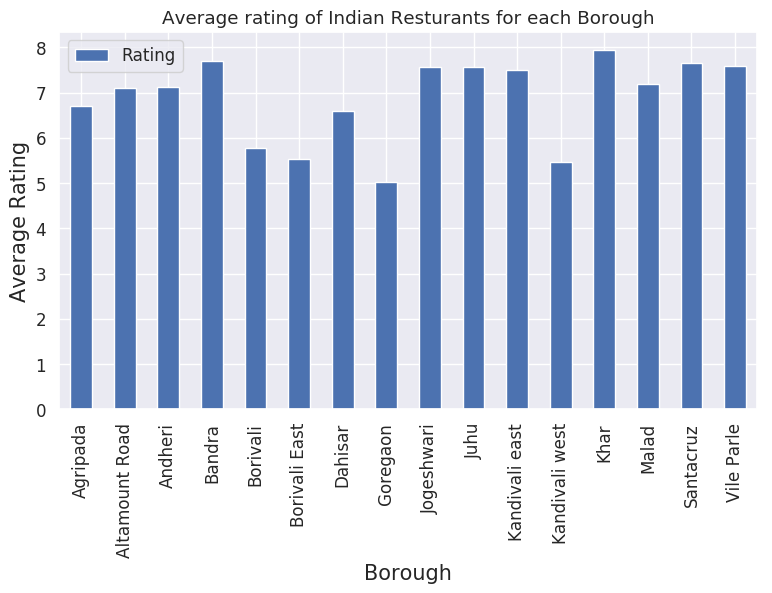

In [97]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Chinese Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
chinese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [90]:
type(ny_neighborhood_stats['Average Rating'][0])

numpy.float64

In [98]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.0]
ny_neighborhood_stats

,Neighbourhood,Average Rating
1,Altamount Road,7.100000
2,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",7.125000
4,"Bandra Kurla Complex,Bandstand Promenade,Gandh...",7.700000
7,"Dindoshi,Sunder Nagar,Pathanwadi,Rani Sati Mar...",7.200000
9,Irla,7.600000
10,"Jogeshwari West,Jogeshwari East",7.575000
11,Juhu,7.566667
12,Kalina,7.650000
14,"Pali Naka,Khar Danda",7.950000
15,"Samta nagar,Damu nagar,Thakur complex,Thakur v...",7.500000


In [99]:
df_mum.head()

,Town,Station,Neighbourhood,Latitude,Longitude
0,Western Suburbs,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.846420
1,Western Suburbs,Bandra,"Bandra Kurla Complex,Bandstand Promenade,Gandh...",19.054979,72.840220
2,Western Suburbs,Borivali,"I.C. Colony,L.I.C. Colony aka Jeevan Bhima Nag...",19.229068,72.857363
3,Western Suburbs,Borivali East,"Magathane,Nancy Colony,Sukurwadi",19.226723,72.861933
4,Western Suburbs,Dahisar,Dahisar,19.257178,72.857536


In [0]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,df_mum, on='Neighbourhood')


In [102]:
ny_neighborhood_stats=ny_neighborhood_stats[['Station','Neighbourhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Station,Neighbourhood,Latitude,Longitude,Average Rating
0,Altamount Road,Altamount Road,18.966362,72.809148,7.100000
1,Andheri,"Amboli,Chakala,D.N. Nagar,Four Bungalows,JB Na...",19.119698,72.846420,7.125000
2,Bandra,"Bandra Kurla Complex,Bandstand Promenade,Gandh...",19.054979,72.840220,7.700000
3,Malad,"Dindoshi,Sunder Nagar,Pathanwadi,Rani Sati Mar...",19.186719,72.848588,7.200000
4,Vile Parle,Irla,19.100289,72.841762,7.600000
5,Jogeshwari,"Jogeshwari West,Jogeshwari East",19.134899,72.848820,7.575000
6,Juhu,Juhu,19.107021,72.827528,7.566667
7,Santacruz,Kalina,19.081522,72.841756,7.650000
8,Khar,"Pali Naka,Khar Danda",19.072458,72.833707,7.950000
9,Kandivali east,"Samta nagar,Damu nagar,Thakur complex,Thakur v...",19.210200,72.864891,7.500000


In [0]:
# create map and display it
ny_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [0]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [0]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighbourhood']+', '+ny_neighborhood_stats['Station']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [108]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

## Conclusion

Altamount Road, Andheri, BAndra are some of the best neighborhoods for Chinese cuisine.

Malabar Hill and Sion have potential Chinese Resturant Market



**Limitations**

The ranking Wasn't completed due to Quota issues as well time limitation.

The accuracy of data depends on the data provided by **FourSquare**